# Car Evaluation Data Analysis in Python

#### Made By : Aman Sahu

## Imports
Here are some neccessary imports we are going to need for this project

- **ucimlrepo.fetch_ucirepo**: This library is a convenient function to directly download and load datasets from the UCI Machine Learning Repository by specifying the dataset ID. This helps us to eliminates manual downloading and keeps our code portable across machines.
- **pandas (pd)**: This library is helpful for tabular data manipulation and analysis. We will use pandas DataFrames to hold, transform, and summarize our data.
- **matplotlib.pyplot (plt)**: The foundation for plot/graph figures in Python. We’ll use it for basic plots and to configure figure sizes, axes labels, and titles.
- **seaborn (sns)**: A high‑level interface built on Matplotlib that provides aesthetically pleasing default styles and specialized plot types (e.g., heatmaps) for statistical data exploration.  


In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset
### Dataset : https://archive.ics.uci.edu/dataset/19/car+evaluation

- We will be importing the **Car Evaluation** dataset from the UCI ML repository. It is convineient that they have an import for their dataset, so a simple pip install inside an environment is easier. This helps us since we do not need to keep downloading the file if we want to work on different machines.
- Importing from the Python library, we can see that the dataset has an `X` column and a `y` column. These are called the features and the target data respectively.

---
We are also able to print some insights about our dataset thanks to the `ucimlrepo` library. We are able to see the metadata and the variables included inside the dataset below.

In [2]:
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# information about the dataset
print(car_evaluation.metadata) 
print(car_evaluation.variables) 


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

## Exploratory Data Analysis

In this section we will perform some data analysis on the dataset. We will be able to do the following:
1.  Combine `X` (features) and `y` (target) into a single DataFrame. This will help us visualize the data better.
2.  Get a high‑level overview of the data
3.  Explore some questions about this dataset and attempt to answer them using some data visualization techniques!

Getting into the first point, we are going to combine the `X` and `y`columns. First, we will create a copy from our `X` features. Then, let us create a new column in the DataFrame. Let's call it `acceptability`. Now we will assign the `y` target to this column. Since we use
``` python3
df['acceptability'] = y
```
This code created a new column and assigned all the values inside the `y` target to this `acceptability` column.

---
Our Final result is a DataFrame which encapsulates all of the data from the dataset.

In [3]:
# combine features and target
df = X.copy()
df['acceptability'] = y

# getting the first 5 rows to see the data
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Data Overview
Below are some interesting functions we will use jsut to show how useful having a dataframe is.

- `df.info()`: This function will display each column name, its data type, and the count of all the non null entries. This helps us easily detect missing values or inconsistent types inside the data.  
- <p><code>df.isnull().sum()</code>: This function is a combination or a <i>chain</i> of functions. This chain will returns the number of missing entries in each column.</p> <p><code>df.isnull()</code> will give all the <i>null value entries</i>, and then the <code>.sum()</code> function is used to return the <i>number</i> of null values. A count of zero indicates a complete dataset. </p>
- `df.describe(include='all')`: This will provide a summary of the statistics for all the columns. For categorical attributes, it reports the number of unique categories, the most frequent category (top), and its frequency. For numeric data is present, it offers mean, standard deviation, min/max, and quartiles.  


In [4]:
# getting the data types of the columns
print(df.info())
print('\nMissing values per column:')
print(df.isnull().sum())

# summary of all columns
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Missing values per column:
buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64


,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


## Analysis Questions
As we delve deeper, lets set a baseline as to what are some of the investigations we might perform:
1. **Distribution of acceptability ratings**: how skewed is the target variable?  
2. **Feature distributions**: do certain categories (like `vhigh` cost or `5more` doors) dominate?  
3. **Safety vs. acceptability**: does higher safety reliably translate to better ratings?  
4. **Top feature combinations**: for `good`/`vgood` cars, what configurations are most desirable?  
5. **Infrequent categories**: which levels occur infrequently (`< 100 samples`) and might need merging?  
6. **Predictive power**: which individual feature best separates `unacc` from `acc`?  
7. **Numeric correlations**: after encoding categories as numbers, which variables correlate strongly?  
8. **Actionable insights**: what key insights emerge for a car manufacturer targeting this market?  

Going thrugh each of these topics, lets form some potential questions we can provide some insightful visual repsresentations and answers with.
1. What is the distribution of car acceptability ratings?  
2. How are the categorical features (`buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety`) distributed individually?  
3. How does safety level relate to car acceptability?  
4. Which combinations of features are most often rated “good” or “vgood”?  
5. Are there any rare or outlier categories that might warrant merging or special treatment?  
6. Which feature appears most predictive of “unacc” vs. “acc” ratings?  
7. If we encode categories numerically, what correlations emerge?  
8. What actionable insights can we derive for someone designing a car in this market?

## Q1: What is the distribution of car acceptability ratings?  

First, we quantify how many cars fall into each of the four acceptability classes: **unacc**, **acc**, **good**, and **vgood**.

- We will first call `value_counts().sort_index()` on the `acceptability` column to get a count for each class in alphabetical order.  
- A bar chart will then visualizes these counts, allowing us to quickly see if the dataset is balanced or dominated by a particular rating.  
- Finally, we display the pandas Series of counts so we can refer to exact numbers when interpreting results.


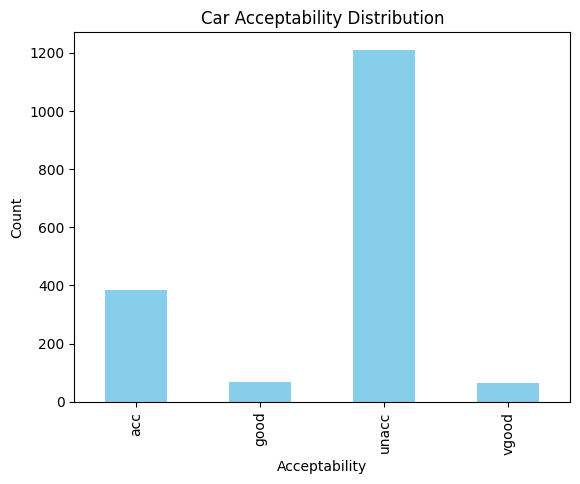

acceptability
acc       384
good       69
unacc    1210
vgood      65
Name: count, dtype: int64

In [5]:
counts = df['acceptability'].value_counts().sort_index() # getting the counts of each acceptability class
counts.plot(kind='bar', title='Car Acceptability Distribution', color='skyblue') # plotting the counts
plt.xlabel('Acceptability')
plt.ylabel('Count')
plt.show()

counts # displaying the graph

## Q2: How are the categorical features distributed individually?  

Next, we inspect each categorical feature on its own to understand its internal distribution:

- Using a 2×3 grid of subplots, we loop through the six attributes—`buying`, `maint`, `doors`, `persons`, `lug_boot`, and `safety`.  
- For each axes and columns, `value_counts()` generates the frequency of each category, which is then plotted as a bar chart. 
- The individual plots allow us to spot whether certain categories like if the “low” maintenance cost or “more” person capacity are underrepresented or are they dominating the dataset.

If we go deeper into the code for this block, there may seem like there is a lot to unpack. But fear not,let us go through it one by one!
1. **Creating a grid of subplots**:  
   - `fig, axes = plt.subplots(2, 3, figsize=(12, 8))` creates a 2×3 grid of plots (6 total plots) with a figure size of 12x8 inches. Each plot will display the distribution of one feature.

2. **Loop through each of the feature**:  
   - `for ax, col in zip(axes.flatten(), df.columns[:-1], strict=True):` \
            loops through the axes (subplots) and the first six columns of the DataFrame. `df.columns[:-1]` excludes the target column `acceptability` since we do not to visualise the target variable. 
   - `strict=True` ensures that the number of axes matches the number of columns being plotted.

3. **Plotting the bar chart for each of the features**:  
   - `df[col].value_counts().plot(kind='bar', ax=ax, title=col, color='salmon')`:  
     - `df[col].value_counts()`  - counts how many times each category appears in the column.  
     - `plot(kind='bar')` - creates a bar chart.  
     - `ax=ax` - specifies which subplot to draw the chart on.  
     - `title=col` - sets the title of the chart to the column name.  
     - `color='salmon'` - sets the bar color to salmon.


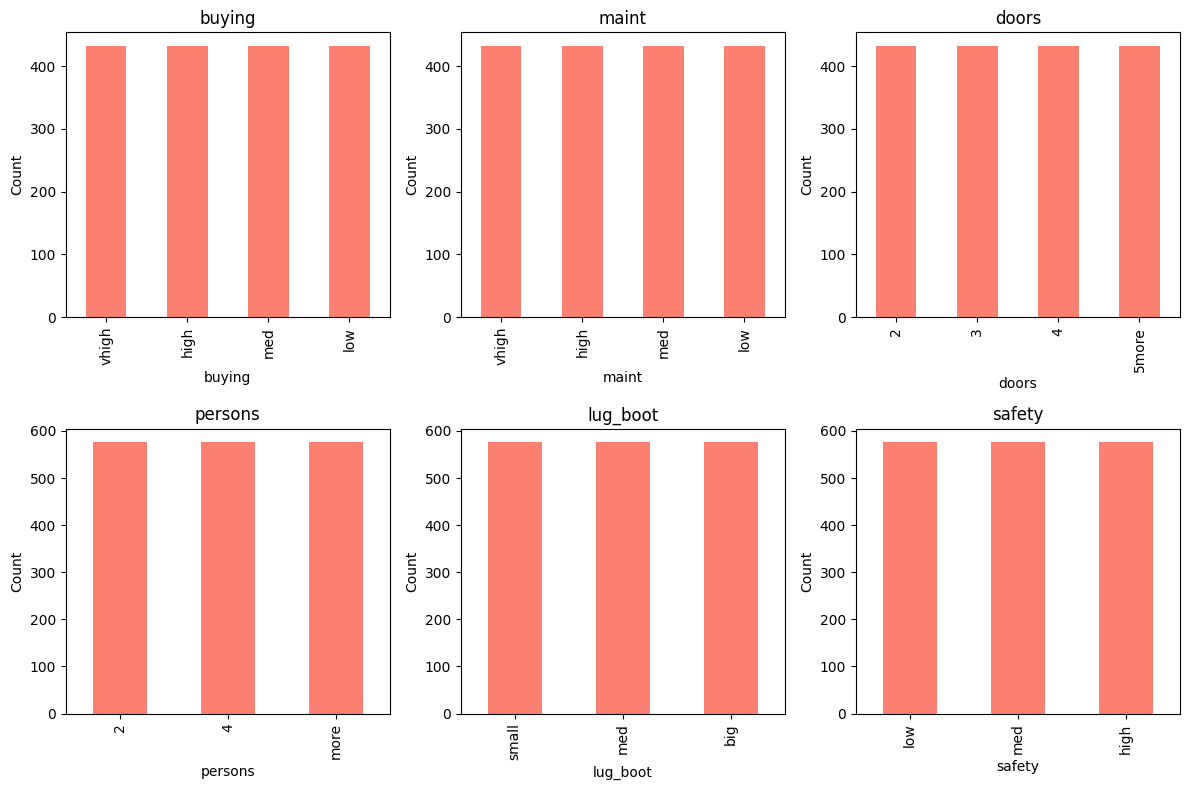

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax, col in zip(axes.flatten(), df.columns[:-1], strict=True):
    df[col].value_counts().plot(kind='bar', ax=ax, title=col, color='salmon')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout() # adjust the layout
plt.show()

## Q3: How does safety level relate to car acceptability?

To understand the role of safety in determining car ratings, let us create a cross tabulation visual:

- `pd.crosstab(df['safety'], df['acceptability'])` computes the raw counts of rating levels within each safety category (low, med, high).  
- We normalize each row by its total to get proportions (`ct.div(ct.sum(1), axis=0)`), revealing how, for instance, cars with “high” safety are distributed across acceptability classes.  
- A heatmap (`sns.heatmap`) visualizes these proportions, with annotations showing exact percentages.  

This analysis can help us to uncover whether increases in safety could correspond to meaningful shifts toward higher acceptability ratings.


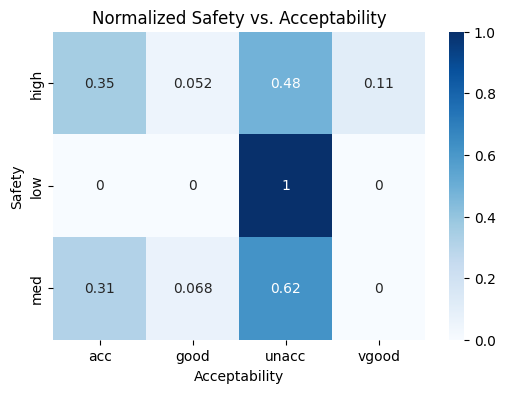

In [7]:
ct = pd.crosstab(df['safety'], df['acceptability'])
ct_norm = ct.div(ct.sum(1), axis=0)

plt.figure(figsize=(6,4))
sns.heatmap(ct_norm, annot=True, cmap='Blues')
plt.title('Normalized Safety vs. Acceptability')
plt.xlabel('Acceptability')
plt.ylabel('Safety')
plt.show()

## Q4: Which combinations of features are most often rated “good” or “vgood”?

Here, let's focus on the subset of cars rated `good` or `vgood`. Using this we can try to identify the feature configurations most associated with these high ratings:
- First, we will Filter `df` to include only rows where `acceptability` is `good` or `vgood.`  
- Next, group by all six categorical features, count the number of occurrences for each unique combination, and sort in descending order by count.  
- FInally, we will extract the top 10 combinations into a DataFrame, showing which buying price, maintenance cost, door count, passenger capacity, luggage boot size, and safety levels which occur together most frequently among top rated cars.  


In [8]:
features = ['buying','maint','doors','persons','lug_boot','safety']
good_df = df[df['acceptability'].isin(['good','vgood'])] # forming new dataframe with only good and very good acceptability
combo_counts = (
    good_df
    .groupby(features) # grouping by features
    .size() # number of rows in each group
    .reset_index(name='count')
    .sort_values('count', ascending=False) # descending order
    .head(10) # get the top 10
)
combo_counts

,buying,maint,doors,persons,lug_boot,safety,count
0,low,high,2,4,big,high,1
84,low,med,5more,more,small,high,1
98,med,low,3,more,med,high,1
97,med,low,3,more,big,med,1
96,med,low,3,more,big,high,1
95,med,low,3,4,small,high,1
94,med,low,3,4,med,high,1
93,med,low,3,4,big,med,1
92,med,low,3,4,big,high,1
91,med,low,2,more,med,high,1


## Q5: Are there any rare or outlier categories that might warrant merging or special treatment?

We scan each feature for levels that appear infrequently. For simplicity, let;s choose a threshold of 100:

- Loop through each column (excluding the target) and find `value_counts()`.  
- Select categories whose counts fall below the 100 sample threshold.  
- Store these rare levels in a dictionary keyed by feature name, mapping to a pandas Series of the rare category counts.  

Finding rare categories can greatly help in deciding whether to merge them with similar levels, exclude them, or flag them for further investigation before modeling or using inside a model.

---
In this dataset, there are not any specific rare categories, so there is no output for the the code below.


In [9]:
rare_cats = {}
for col in df.columns[:-1]:
    vc = df[col].value_counts()
    rare = vc[vc < 100]
    if not rare.empty:
        rare_cats[col] = rare
rare_cats

{}

## Q6: Which feature appears most predictive of “unacc” vs. “acc” ratings?

Now, let us try to find out which feature best differentiates unacceptable cars from acceptable ones. To analyze this, we will create a binary indicator:

- Create a new column in the DataFrame called `is_unacc` that is `True` when `acceptability == 'unacc'` and `False` otherwise.  
- For each feature, compute a normalized crosstab (`pd.crosstab`) of feature level vs. `is_unacc`.  
- Calculate the absolute difference between the proportion of unacceptable vs. acceptable cars for each level, then take the maximum difference across levels.  
- Produce a pandas Series of these maximum differences and sort it to rank features by descending order.  

One situation where is might be helpful is whether `safety` or `buying` price yields the largest swing in “unacc” probability across its categories.

---
We can see that `persons` and `safety` are the features which help most differentiate cars from acceptable and unacceptable.

In [10]:
df['is_unacc'] = (df['acceptability'] == 'unacc')
predictive_range = {}
for col in df.columns[:-2]:  # exclude acceptability and is_unacc
    ct = pd.crosstab(df[col], df['is_unacc'], normalize='index')
    predictive_range[col] = (ct[True] - ct[False]).abs().max()
pd.Series(predictive_range).sort_values(ascending=False)

persons     1.000000
safety      1.000000
buying      0.666667
maint       0.666667
lug_boot    0.562500
doors       0.509259
dtype: float64

## Q7: If we encode categories numerically, what correlations emerge?  
This is an interesting approach we can use to find the correltations between categories. We can convert all categories to numeric scales by using ordinal values for each of the features. Ordinal values are just those values which are in a 'rank' system. For example, you have an ordinal scale: good, better, best. Good being the least weighted ordinal and best being the highest weighted ordinal.

- Define mapping dictionaries for each feature, assigning ordinal values (“low”=1, “med”=2, “high”=3).  
- Map `acceptability` to numeric ranks (`unacc`=1 through `vgood`=4).  
- Create a copy of `df`, apply the mappings, then compute the full correlation matrix (`df_enc.corr()`).  
- Visualize with a heatmap to highlight which features correlate most strongly with each other and with the target.  

---
As we can see in our resulting matrix, `acceptability` and 'safety' are the highest correlated with a correlation value of `~0.44`

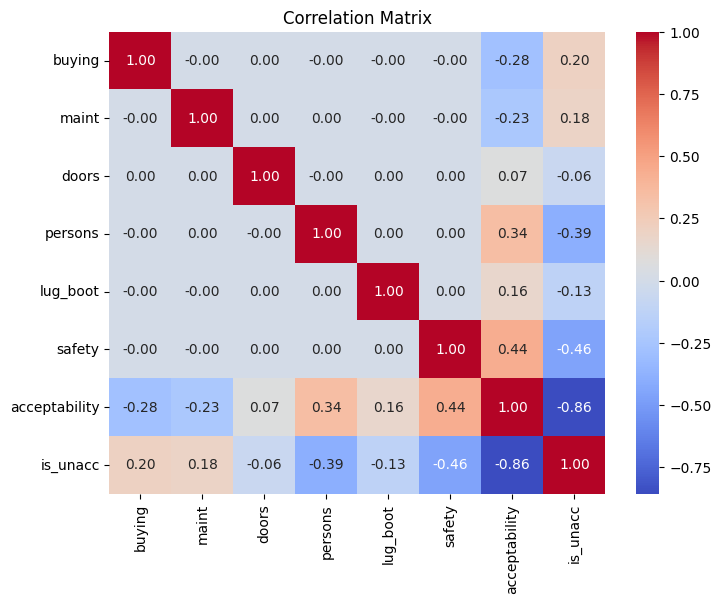

,buying,maint,doors,persons,lug_boot,safety,acceptability,is_unacc
buying,1.000000e+00,-2.320675e-15,4.225325e-15,-2.361991e-16,-1.522353e-16,-1.511298e-15,-0.282750,0.204487
maint,-2.320675e-15,1.000000e+00,7.704758e-16,1.173965e-16,-1.663116e-16,-2.676613e-16,-0.232422,0.181892
doors,4.225325e-15,7.704758e-16,1.000000e+00,-4.419993e-17,5.820592e-17,8.931518e-17,0.066057,-0.062137
persons,-2.361991e-16,1.173965e-16,-4.419993e-17,1.000000e+00,7.715463e-19,9.445833e-18,0.341707,-0.392936
lug_boot,-1.522353e-16,-1.663116e-16,5.820592e-17,7.715463e-19,1.000000e+00,8.867592e-18,0.157932,-0.126853
safety,-1.511298e-15,-2.676613e-16,8.931518e-17,9.445833e-18,8.867592e-18,1.000000e+00,0.439337,-0.462551
acceptability,-2.827504e-01,-2.324215e-01,6.605665e-02,3.417068e-01,1.579317e-01,4.393373e-01,1.000000,-0.856420
is_unacc,2.044871e-01,1.818919e-01,-6.213698e-02,-3.929360e-01,-1.268533e-01,-4.625506e-01,-0.856420,1.000000


In [11]:
# ordinal encoding using a dictionary
mapping = {
    'buying': {'vhigh':4,'high':3,'med':2,'low':1},
    'maint':  {'vhigh':4,'high':3,'med':2,'low':1},
    'doors':  {'2':2,'3':3,'4':4,'5more':5},
    'persons':{'2':2,'4':4,'more':6},
    'lug_boot':{'small':1,'med':2,'big':3},
    'safety': {'low':1,'med':2,'high':3}
}
acc_map = {'unacc':1,'acc':2,'good':3,'vgood':4}

df_enc = df.copy()
for col, m in mapping.items():
    df_enc[col] = df_enc[col].map(m)
df_enc['acceptability'] = df_enc['acceptability'].map(acc_map)

# plotting the correlation matrix
corr = df_enc.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

corr

## Q8: What actionable insights can we derive for someone designing a car in this market?

Based on our exploratory analysis, we can confidentally conclude with some of our findings:

- We found that **Safety** emerges as the single most influential factor. Higher safety ratings sharply increase the likelihood of an acceptable or better car rating.  
- **Moderate cost tiers** Cars with "med" or "low" buying and maintenance costs tend to perform better in terms of acceptability. Extremely high costs ("vhigh") are associated with poorer ratings. 
- **Space vs. safety trade‑off**: cars with smaller luggage boots and high safety often achieve “vgood” which is likely suggesting buyers accept reduced cargo space if safety is increased.  
- **Infrequent categories**: this analysis revealed no significant outliers or underrepresented levels in the dataset; the data is well-distributed across all features.
- **Correlation insights**: the correlation matrix highlighted that "safety" and "acceptability" have the strongest positive correlation (~0.44). This reinforces the importance of safety in determining car ratings.

---
